
### 数据的准备

需要下载的[数据地址]( https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip).这里需要翻墙。

下载的图片为zip的格式，所以这里我们需要将数据解压缩实现。


In [4]:
# 数据的解压
import os
import zipfile

local_zip = 'F:\\Study\\datasets\\TF1\\exe02\\horse-or-human.zip'
# 解压类
zip_ref = zipfile.ZipFile(local_zip,'r')
# 解压文件
zip_ref.extractall('F:\\Study\\datasets\\TF1\\exe02\\horse-or-human')
zip_ref.close()


In [3]:
# 数据导入地址
import os

train_horse_dir = os.path.join('F:\\Study\\datasets\\TF1\\exe02\\horse-or-human\\horses')
train_human_dir = os.path.join('F:\\Study\\datasets\\TF1\\exe02\\horse-or-human\\humans')



In [4]:
# 获得图片的具体的位置
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [12]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [5]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

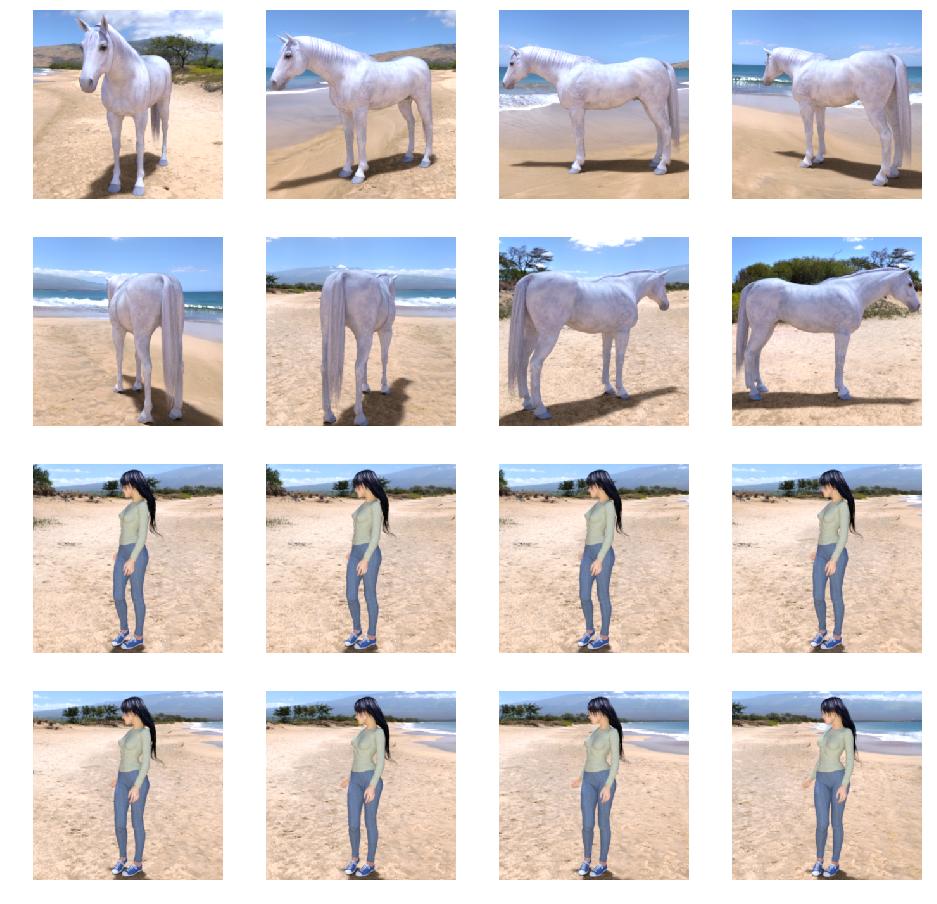

In [14]:

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### 创建模型

#### 导入相关的模型

导入tensorflow库,并且创建相关的模型。
- 5层卷积层
- 两层全连接层
- 最后的输出层选择的是‘sigmoid’来输出，因为是二值判断的问题


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 第二层
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 第三层
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 第四层
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 第五层
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 拉伸为1维
    tf.keras.layers.Flatten(),
    # 第一个密集层
    tf.keras.layers.Dense(512,activation='relu'),
    # 最后输出
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

#### 数据处理

这里有一个python生成器的概念，我们可以简单的想象成，一个数据生产工厂，需要多少就生产多少。这样的一个好处是，如果我们的数据有千万级别的量，我们不可一次性将所有的数据都缓存到程序中，所以需要一部分一部分的去取。 那么这里Generator这个应用就非常好的帮助我们解决这个问题。

**ImageDataGenerator**

但是Keras这generator更加强大，除了可以去取数据，而且可以对数据进行加工，比如：
- 将数据rescale,做归一化
- width_shift_range
- height_shift_range
- shear_range
- zoom_range
- channel_shift_range
- horizontal_flip
- ...

以上都是对图像进行增强iamge argument的方法，对于我们模型的泛化有很大的作用。这样一张图片就可以生成多张图片了。

需要了解详细细节如下：
- [keras中文官网](https://keras.io/zh/preprocessing/image/)
- [keras英文官网](https://keras.io/preprocessing/image/)
- [tf.keras英文官网](https://tensorflow.google.cn/versions/r1.15/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

**flow**
这两个函数都是配合ImageDataGenerator来使用，主要的作用采集数据和标签数组，生成批量增强数据。


>flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)

参数：

> x: 输入数据。秩为 4 的 Numpy 矩阵或元组。如果是元组，第一个元素应该包含图像，第二个元素是另一个 Numpy 数组或一列 Numpy 数组，它们不经过任何修改就传递给输出。可用于将模型杂项数据与图像一起输入。对于灰度数据，图像数组的通道轴的值应该为 1，而对于 RGB 数据，其值应该为 3。
y: 标签。
batch_size: 整数 (默认为 32)。
shuffle: 布尔值 (默认为 True)。
sample_weight: 样本权重。
seed: 整数（默认为 None）。
save_to_dir: None 或 字符串（默认为 None）。这使您可以选择指定要保存的正在生成的增强图片的目录（用于可视化您正在执行的操作）。
save_prefix: 字符串（默认 ''）。保存图片的文件名前缀（仅当 save_to_dir 设置时可用）。
save_format: "png", "jpeg" 之一（仅当 save_to_dir 设置时可用）。默认："png"。
subset: 数据子集 ("training" 或 "validation")，如果 在 ImageDataGenerator 中设置了 validation_split。

返回：
>一个生成元组 (x, y) 的 Iterator，其中 x 是图像数据的 Numpy 数组（在单张图像输入时），或 Numpy 数组列表（在额外多个输入时），y 是对应的标签的 Numpy 数组。如果 'sample_weight' 不是 None，生成的元组形式为 (x, y, sample_weight)。如果 y 是 None, 只有 Numpy 数组 x 被返回

**flow_from_directory**

从一个文件夹中输入数据

>flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

参数

>directory: 目标目录的路径。每个类应该包含一个子目录。任何在子目录树下的 PNG, JPG, BMP, PPM 或 TIF 图像，都将被包含在生成器中。
target_size: 整数元组 (height, width)，默认：(256, 256)。所有的图像将被调整到的尺寸。
color_mode: "grayscale", "rbg" 之一。默认："rgb"。图像是否被转换成 1 或 3 个颜色通道。
classes: 可选的类的子目录列表（例如 ['dogs', 'cats']）。默认：None。如果未提供，类的列表将自动从 directory 下的 子目录名称/结构 中推断出来，其中每个子目录都将被作为不同的类（类名将按字典序映射到标签的索引）。包含从类名到类索引的映射的字典可以通过 class_indices 属性获得。
class_mode: "categorical", "binary", "sparse", "input" 或 None 之一。默认："categorical"。决定返回的标签数组的类型：
"categorical" 将是 2D one-hot 编码标签，
"binary" 将是 1D 二进制标签，"sparse" 将是 1D 整数标签，
"input" 将是与输入图像相同的图像（主要用于自动编码器）。
如果为 None，不返回标签（生成器将只产生批量的图像数据，对于 model.predict_generator(), model.evaluate_generator() 等很有用）。请注意，如果 class_mode 为 None，那么数据仍然需要驻留在 directory 的子目录中才能正常工作。
batch_size: 一批数据的大小（默认 32）。
shuffle: 是否混洗数据（默认 True）。
seed: 可选随机种子，用于混洗和转换。
save_to_dir: None 或 字符串（默认 None）。这使你可以最佳地指定正在生成的增强图片要保存的目录（用于可视化你在做什么）。
save_prefix: 字符串。 保存图片的文件名前缀（仅当 save_to_dir 设置时可用）。
save_format: "png", "jpeg" 之一（仅当 save_to_dir 设置时可用）。默认："png"。
follow_links: 是否跟踪类子目录中的符号链接（默认为 False）。
subset: 数据子集 ("training" 或 "validation")，如果 在 ImageDataGenerator 中设置了 validation_split。
interpolation: 在目标大小与加载图像的大小不同时，用于重新采样图像的插值方法。 支持的方法有 "nearest", "bilinear", and "bicubic"。 如果安装了 1.1.3 以上版本的 PIL 的话，同样支持 "lanczos"。 如果安装了 3.4.0 以上版本的 PIL 的话，同样支持 "box" 和 "hamming"。 默认情况下，使用 "nearest"。

返回

>一个生成 (x, y) 元组的 DirectoryIterator，其中 x 是一个包含一批尺寸为 (batch_size, *target_size, channels)的图像的 Numpy 数组，y 是对应标签的 Numpy 数组




In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'F:\\Study\\datasets\\TF1\\exe02\\horse-or-human',  # 图片的路劲
        target_size=(300, 300),  # 将图片size到300x300的尺寸
        batch_size=128, # 每一个batch的大小
       
        class_mode='binary') # 类的模式，

Found 1027 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
9/9 [==============================] - 58s 6s/step - loss: 0.7917 - acc: 0.6095
Epoch 2/15
9/9 [==============================] - 6s 677ms/step - loss: 1.1516 - acc: 0.6923
Epoch 3/15
9/9 [==============================] - 6s 664ms/step - loss: 0.4636 - acc: 0.8140
Epoch 4/15
9/9 [==============================] - 6s 649ms/step - loss: 0.2594 - acc: 0.8832
Epoch 5/15
9/9 [==============================] - 6s 697ms/step - loss: 0.1517 - acc: 0.9494
Epoch 6/15
9/9 [==============================] - 6s 678ms/step - loss: 0.2280 - acc: 0.9036
Epoch 7/15
9/9 [==============================] - 6s 648ms/step - loss: 0.0632 - acc: 0.9708
Epoch 8/15
9/9 [==============================] - 6s 644ms/step - loss: 0.1982 - acc: 0.9279
Epoch 9/15
9/9 [==============================] - 6s 651ms/step - loss: 0.2836 - acc: 0.9270
Epoch 10/15
9/9 [==============================] - 6s 642ms/step - loss: 0.0300 - acc: 0.9873
Epoch 11/15
9/9 [======

### 测试模型



In [16]:
import numpy as np
from keras.preprocessing import image
pthFolder = os.path.join("F:\\Study\\DeepLearning\\TensorflowPractice\\WK01\\test\\")
test_horse_human = os.listdir(pthFolder)

for fn in test_horse_human:
 
    # predicting images
    path = pthFolder+ fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(str(fn) + " is a human")
    else:
        print(str(fn) + " is a horse")

[0.]
023d074e222e3a281490c6f7bf7775df.jpg is a horse
[1.]
269d3206c3bb844198f2840e2986d638.jpg is a human
[1.]
45b63967c9c395228da5e6a208264940.jpg is a human
[1.]
80f0df68ad284d5a780b488c8d0466c6.jpg is a human
[0.]
92f951f9375c8f63d0bef8995f4aa045.jpg is a horse
[0.]
b68c202db8560178c6437e96bdc026c3.jpg is a horse
[0.]
ef4b09ac9e671a232036ca01766c4c57.jpeg is a horse


D:\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


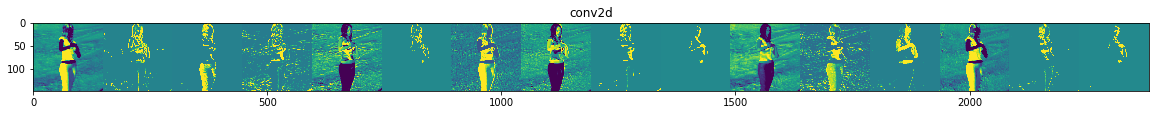

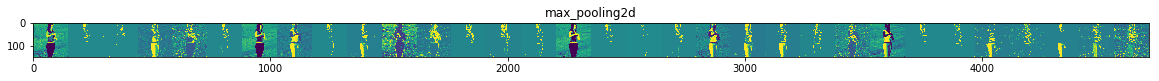

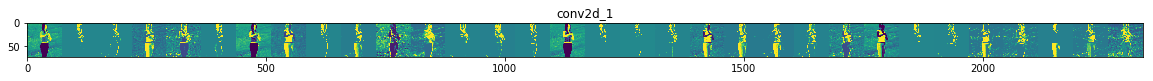

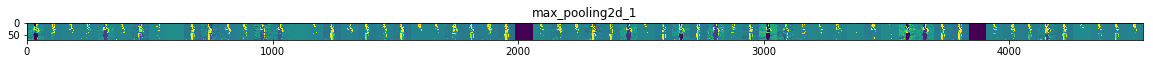

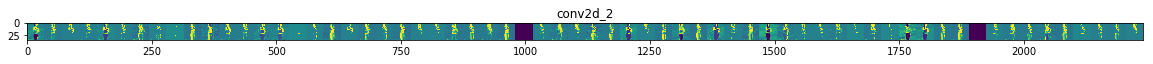

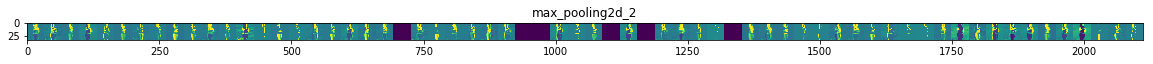

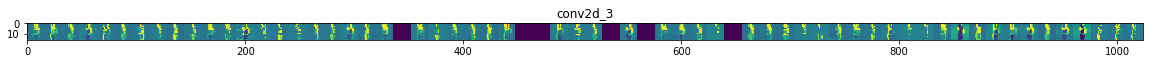

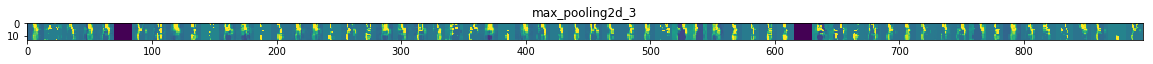

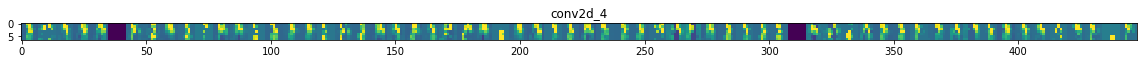

In [17]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')